In [1]:
import torch

## Representing text as vectors

In [2]:
sentences = ["the cat sat on the mat", "the dog ate my homework"]

ultimately our input data - the data which feeds into the model is a sentence, 
and our aim here is to represent this sentence on a word level or a character level

### one-hot encoding

#### Word level

In [3]:
# get vocabulary
index = 0
vocab = dict()
for sentence in sentences:
    for word in sentence.split(" "):
        if vocab.get(word) == None:
            vocab[word] = index
            index += 1

In [4]:
vocab

{'the': 0,
 'cat': 1,
 'sat': 2,
 'on': 3,
 'mat': 4,
 'dog': 5,
 'ate': 6,
 'my': 7,
 'homework': 8}

In [5]:
vector_size = len(vocab)

In [6]:
for sentence in sentences:
    sentence = sentence.split()
    sentence_length = len(sentence)
    indices = torch.tensor([vocab[word] for word in sentence], dtype=torch.int64)
    indices.unsqueeze_(1)
    sentence_matrix = torch.zeros(sentence_length, vector_size, dtype=torch.int64)
    sentence_matrix.scatter_(1, indices, 1)
    
    print(sentence_matrix)
    print(sentence_matrix.shape)
    print()

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0]])
torch.Size([6, 9])

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1]])
torch.Size([5, 9])



##### Batching the data

In [7]:
# generally all the sentences should be of same length to batch the data
max_sentence_length = 5 # i.e 5 words per sentence at max
result = torch.zeros((len(sentences), max_sentence_length, vector_size), # no. of sentences,
                    dtype=torch.int64)                                   # no. of words in a sentence
                                                                         # size of the word vector
                                                                       
        
for i, sentence in enumerate(sentences):
    sentence = sentence.split()
    sentence = sentence[:max_sentence_length] # clipping the sentence to max_sentence_length
    for j, word in enumerate(sentence):
        index = vocab.get(word)
        result[i, j, index] = 1
        

print(result)
print(result.shape)

tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 1]]])
torch.Size([2, 5, 9])


#### Character level

In [8]:
import string

In [9]:
max_sentence_length = 50 # i.e no more than 50 charcters per sentence
vector_size = 128 # ascii characters
result = torch.zeros((len(sentences), max_sentence_length, vector_size), # no. of sentences,
                     dtype=torch.int64)                                  # no. of characters in each sentence
                                                                         # size of each character vector
    
for i, sentence in enumerate(sentences):
    for j, character in enumerate(sentence):
        if character not in string.printable:
            continue
        index = ord(character)
        result[i, j, index] = 1
        
print(result)
print(result.shape)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
torch.Size([2, 50, 128])


##### Word Level one hot hashing

Here we don't create the vocabulary in the beginning.
We run every word through a hash function and map it to a number between 1 and dimensionality.
but the problem here is that every word will not have a unique hash value which might confuse the model.

In [10]:
max_sentence_length = 10 # maximum of 10 words per sentence
dimensionality = 1000 # size of word vector

result = torch.zeros((len(sentences), max_sentence_length, dimensionality), # no. of sentences,
                    dtype=torch.int64)                                      # no. of words in a sentence
                                                                            # size of the word vector
                                                                       
        
for i, sentence in enumerate(sentences):
    sentence = sentence.split()
    sentence = sentence[:max_sentence_length] # clipping the sentence to max_sentence_length
    for j, word in enumerate(sentence):
        index = abs(hash(word)) % dimensionality
        result[i, j, index] = 1
        
print(result)
print(result.shape)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
torch.Size([2, 10, 1000])


### Embeddings

In [11]:
import torch.nn as nn

In [12]:
embedding_layer = nn.Embedding(10, 128)

In [13]:
embedding_layer.weight.shape

torch.Size([10, 128])

In [14]:
# get vector of word whose index is 1
embedding_layer(torch.tensor([1])).shape

torch.Size([1, 128])

#### N-Gram language modeling

In [15]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10

In [16]:
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold."""

In [17]:
import nltk

In [18]:
from nltk.tokenize import WordPunctTokenizer

In [19]:
tokenizer = WordPunctTokenizer()

In [20]:
words = tokenizer.tokenize(test_sentence)

In [21]:
trigrams = [([words[i], words[i+1]], words[i+2]) for i in range(len(words)-2)]

In [22]:
trigrams[:6]

[(['When', 'forty'], 'winters'),
 (['forty', 'winters'], 'shall'),
 (['winters', 'shall'], 'besiege'),
 (['shall', 'besiege'], 'thy'),
 (['besiege', 'thy'], 'brow'),
 (['thy', 'brow'], ',')]

In [23]:
vocab = set(words)

In [24]:
VOCAB_SIZE = len(vocab)

In [25]:
word2idx = {word: i for i, word in enumerate(vocab)}

##### Building the model

In [26]:
import torch.nn.functional as F

In [27]:
class NGramLanguageModeler(nn.Module):
    def __init__(self, CONTEXT_SIZE, EMBEDDING_DIM, VOCAB_SIZE):
        super().__init__()
        self.CONTEXT_SIZE = CONTEXT_SIZE
        self.EMBEDDING_DIM = EMBEDDING_DIM
        self.embeddings = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM)
        self.linear1 = nn.Linear(CONTEXT_SIZE*EMBEDDING_DIM, 128)
        self.linear2 = nn.Linear(128, VOCAB_SIZE)
        
    def forward(self, inputs):
        if inputs.shape[0] != self.CONTEXT_SIZE:
            raise ValueError(f"The context size should be of size {self.CONTEXT_SIZE}")
        word_vectors = self.embeddings(inputs)
        # we flatten the inputs before passing onto the linear layer
        word_vectors = word_vectors.view(-1, self.CONTEXT_SIZE * self.EMBEDDING_DIM)
        out = F.relu(self.linear1(word_vectors))
        logits = self.linear2(out)
        
        return logits

In [28]:
import torch.optim as optim

In [29]:
model = NGramLanguageModeler(CONTEXT_SIZE, EMBEDDING_DIM, VOCAB_SIZE)

In [30]:
loss_list = []
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [31]:
n_epochs = 50

In [32]:
from tqdm import tqdm

In [33]:
for epoch in tqdm(range(n_epochs)):
    loss_per_epoch = 0
    for context, target in trigrams:
        context_indices = torch.tensor([word2idx[word] for word in context], dtype=torch.int64)
        out = model(context_indices)
        loss = loss_fn(out, torch.tensor([word2idx[target]], dtype=torch.int64))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_per_epoch += loss.item()
    loss_list.append(loss_per_epoch)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.13it/s]


In [34]:
import matplotlib.pyplot as plt

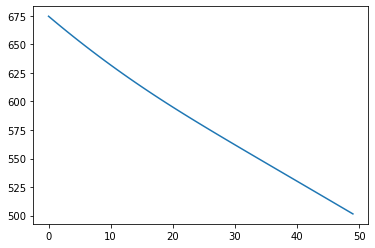

In [35]:
plt.plot(list(range(n_epochs)), loss_list)

## RNN

#### Simple RNN with pytorch

##### Create test data

In [36]:
input_vector_size = 128

In [37]:
embed = nn.Embedding(1000, input_vector_size)

In [38]:
test_sequence = torch.tensor([1, 4, 12, 18, 230, 111, 11], dtype=torch.int64)

##### Creating an RNN from scratch

In [39]:
state_size = 64
state = torch.zeros(state_size) # initializing the hidden state

In [40]:
Wi = torch.randn((state_size, input_vector_size)) # transformation matrix of input xi
Ws = torch.randn((state_size, state_size)) # transformation matrix of state
b = torch.randn(state_size) # bias 

In [41]:
Wi.shape, Ws.shape, b.shape

(torch.Size([64, 128]), torch.Size([64, 64]), torch.Size([64]))

##### Forward Pass

In [42]:
sequence_tensor = embed(test_sequence)

In [43]:
state_t = state
for x in sequence_tensor:
    output_t = torch.tanh(torch.matmul(Ws, state_t) + torch.matmul(Wi, x) + b)
    state_t = output_t

#### Pytorch RNN Layer

In [44]:
rnn = nn.RNN(input_vector_size, state_size, batch_first=True)

##### We'll compare pytorch rnn output and our output and check if they are same

In [45]:
# using weights from pytorch's rnn layer
Wi = rnn.weight_ih_l0
bi = rnn.bias_ih_l0
Wh = rnn.weight_hh_l0
bh = rnn.bias_hh_l0

In [46]:
Wi.shape, bi.shape, Wh.shape, bh.shape

(torch.Size([64, 128]),
 torch.Size([64]),
 torch.Size([64, 64]),
 torch.Size([64]))

In [47]:
h0 = state # initializing hidden state

##### First let's test our custom rnn

In [48]:
states_list = []
state_t = state
for x in sequence_tensor:
    output_t = torch.tanh(torch.matmul(Wi, x) + bi + torch.matmul(Wh, state_t) +  bh)
    state_t = output_t
    states_list.append(state_t)

In [49]:
output_t # final output of the last timestamp

tensor([-0.1538,  0.9347,  0.7296,  0.7717,  0.0053,  0.0352, -0.6093,  0.1462,
        -0.6054, -0.8625, -0.7908,  0.9317, -0.7929, -0.1757,  0.8325,  0.4964,
        -0.8150,  0.8474,  0.1338,  0.8385,  0.5589, -0.7716, -0.1686,  0.7162,
        -0.9401, -0.8225, -0.6820,  0.4487,  0.2680,  0.2931, -0.5631,  0.7256,
         0.8582,  0.7073, -0.3750, -0.3470, -0.2613, -0.4475,  0.3777, -0.2594,
        -0.6955,  0.9514, -0.5481,  0.7562, -0.0182, -0.0740,  0.0812,  0.5066,
        -0.1386,  0.5738, -0.3389, -0.6417,  0.8674,  0.4195, -0.8150, -0.3845,
        -0.0085,  0.5888, -0.9176, -0.1380, -0.7844,  0.7922,  0.9049, -0.7361],
       grad_fn=<TanhBackward>)

In [50]:
states_list # a list containing intermediate states

[tensor([ 0.6902, -0.6426,  0.7828,  0.7758,  0.1088,  0.9638, -0.9412, -0.8770,
         -0.3936, -0.1240, -0.0599,  0.9660,  0.3182, -0.8015, -0.3295, -0.1352,
          0.1999, -0.4119, -0.5083,  0.8436,  0.6053,  0.4503, -0.2808,  0.7617,
         -0.9603, -0.8197,  0.9601, -0.6824, -0.0191, -0.1181, -0.9241, -0.6260,
          0.5252, -0.2527,  0.4631, -0.0237, -0.9413, -0.8928, -0.0671,  0.1388,
         -0.6575,  0.3038,  0.0547,  0.2883, -0.7080, -0.8493,  0.4100,  0.4838,
          0.2452, -0.3934,  0.1744, -0.6237, -0.7903,  0.1194, -0.0174, -0.9471,
         -0.3420,  0.2886,  0.2486,  0.5731, -0.3336, -0.2695, -0.4414, -0.2608],
        grad_fn=<TanhBackward>),
 tensor([ 0.3649,  0.7335,  0.6849, -0.3175, -0.7331, -0.6399, -0.5019,  0.2697,
          0.9694, -0.2267, -0.1909, -0.7884, -0.2040,  0.9877,  0.1272, -0.1171,
         -0.3121, -0.6973,  0.2080, -0.7877, -0.4868, -0.7071, -0.1992,  0.2603,
          0.7421,  0.0181,  0.6090,  0.8957,  0.7196, -0.9174,  0.5055,  0.

##### Now let's test the same with pytorch's rnn

In [51]:
h0 = torch.zeros((1, 1, state_size))

In [52]:
h0.shape

torch.Size([1, 1, 64])

In [53]:
sequence_tensor_batch = sequence_tensor.unsqueeze(0)

In [54]:
out = rnn(sequence_tensor_batch, h0)

In [55]:
out[0]

tensor([[[ 6.9023e-01, -6.4258e-01,  7.8281e-01,  7.7581e-01,  1.0875e-01,
           9.6378e-01, -9.4120e-01, -8.7700e-01, -3.9362e-01, -1.2398e-01,
          -5.9866e-02,  9.6596e-01,  3.1819e-01, -8.0149e-01, -3.2952e-01,
          -1.3519e-01,  1.9985e-01, -4.1187e-01, -5.0832e-01,  8.4365e-01,
           6.0534e-01,  4.5029e-01, -2.8083e-01,  7.6172e-01, -9.6030e-01,
          -8.1974e-01,  9.6014e-01, -6.8243e-01, -1.9146e-02, -1.1808e-01,
          -9.2405e-01, -6.2597e-01,  5.2519e-01, -2.5274e-01,  4.6310e-01,
          -2.3658e-02, -9.4129e-01, -8.9276e-01, -6.7115e-02,  1.3884e-01,
          -6.5753e-01,  3.0383e-01,  5.4706e-02,  2.8832e-01, -7.0805e-01,
          -8.4933e-01,  4.1005e-01,  4.8375e-01,  2.4520e-01, -3.9339e-01,
           1.7442e-01, -6.2375e-01, -7.9031e-01,  1.1945e-01, -1.7373e-02,
          -9.4712e-01, -3.4205e-01,  2.8865e-01,  2.4859e-01,  5.7308e-01,
          -3.3358e-01, -2.6950e-01, -4.4139e-01, -2.6081e-01],
         [ 3.6492e-01,  7.3348e-01,  

In [56]:
out[1]

tensor([[[-0.1538,  0.9347,  0.7296,  0.7717,  0.0053,  0.0352, -0.6093,
           0.1462, -0.6054, -0.8625, -0.7908,  0.9317, -0.7929, -0.1757,
           0.8325,  0.4964, -0.8150,  0.8474,  0.1338,  0.8385,  0.5589,
          -0.7716, -0.1686,  0.7162, -0.9401, -0.8225, -0.6820,  0.4487,
           0.2680,  0.2931, -0.5631,  0.7256,  0.8582,  0.7073, -0.3750,
          -0.3470, -0.2613, -0.4475,  0.3777, -0.2594, -0.6955,  0.9514,
          -0.5481,  0.7562, -0.0182, -0.0740,  0.0812,  0.5066, -0.1386,
           0.5738, -0.3389, -0.6417,  0.8674,  0.4195, -0.8150, -0.3845,
          -0.0085,  0.5888, -0.9176, -0.1380, -0.7844,  0.7922,  0.9049,
          -0.7361]]], grad_fn=<StackBackward>)

##### Voila! Both the intermediate hidden states and the final output is the exact same

 #### Let's do the same comparision with stacked (2 layer) RNN

In [57]:
stacked_rnn = nn.RNN(input_vector_size, state_size, batch_first=True, num_layers=2)

In [58]:
stacked_rnn

RNN(128, 64, num_layers=2, batch_first=True)

##### Custom RNN

In [59]:
# layer 1
Wi0 = stacked_rnn.weight_ih_l0
bi0 = stacked_rnn.bias_ih_l0
Wh0 = stacked_rnn.weight_hh_l0
bh0 = stacked_rnn.bias_hh_l0

# layer 2
Wi1 = stacked_rnn.weight_ih_l1
bi1 = stacked_rnn.bias_ih_l1
Wh1 = stacked_rnn.weight_hh_l1
bh1 = stacked_rnn.bias_hh_l1

In [60]:
print(Wi0.shape, bi0.shape, Wh0.shape, bh0.shape)
print(Wi1.shape, bi1.shape, Wh1.shape, bh1.shape)

torch.Size([64, 128]) torch.Size([64]) torch.Size([64, 64]) torch.Size([64])
torch.Size([64, 64]) torch.Size([64]) torch.Size([64, 64]) torch.Size([64])


In [61]:
h0 = torch.zeros(state_size)
h1 = torch.zeros(state_size)

##### Let's only compare the final output state

In [62]:
for x in sequence_tensor:
    output_t0 = torch.tanh(torch.matmul(Wi0, x) + bi0 + torch.matmul(Wh0, h0) +  bh0)
    h0 = output_t0
    output_t1 = torch.tanh(torch.matmul(Wi1, output_t0) + bi1 + torch.matmul(Wh1, h1) +  bh1)
    h1 = output_t1

In [63]:
output_t0

tensor([-0.3040, -0.7206,  0.4327, -0.3948,  0.7157, -0.8285,  0.1730,  0.3187,
         0.8709, -0.9211, -0.1380,  0.5022,  0.6089,  0.8666, -0.8169,  0.3745,
        -0.8762, -0.7781,  0.0329, -0.9537, -0.6276, -0.1819,  0.7403,  0.6341,
         0.3235,  0.4908, -0.1424, -0.0802, -0.7671, -0.4847,  0.0573,  0.6085,
         0.8735, -0.8274, -0.1856, -0.3978, -0.4590,  0.1027, -0.7695,  0.9689,
        -0.0595,  0.7864, -0.8305, -0.7630, -0.6278,  0.2638,  0.8462, -0.5419,
         0.6264, -0.6404,  0.9179, -0.3545, -0.8668, -0.6995, -0.2720, -0.1060,
        -0.2285, -0.7063, -0.8376, -0.4023,  0.3161,  0.3398,  0.6905, -0.4741],
       grad_fn=<TanhBackward>)

In [64]:
output_t1

tensor([-0.6532, -0.2377,  0.5428, -0.1767, -0.0807, -0.3861, -0.3155, -0.7183,
         0.7231, -0.0166,  0.5051, -0.1257, -0.5053,  0.1901, -0.3643, -0.0653,
         0.0941, -0.3174, -0.2137, -0.5508, -0.2560, -0.3790,  0.3109, -0.0227,
        -0.1050,  0.2032,  0.5722, -0.2836, -0.5619, -0.2735, -0.2176, -0.5239,
         0.5023,  0.0414,  0.4168,  0.5851, -0.0250, -0.5020,  0.2633, -0.1788,
         0.2757, -0.3850, -0.3017,  0.4231, -0.1724,  0.3517,  0.4816,  0.6312,
        -0.1027,  0.1863, -0.1371,  0.3120,  0.1851, -0.5933,  0.2322,  0.1761,
         0.4492,  0.0303, -0.3130, -0.1995,  0.3242, -0.3520,  0.0558, -0.0165],
       grad_fn=<TanhBackward>)

##### Pytorch's stacked RNN

In [65]:
# initializing two hidden states: one for each layer
h = torch.zeros((2, 1, state_size)) 

In [66]:
h.shape

torch.Size([2, 1, 64])

In [67]:
sequence_tensor_batch = sequence_tensor.unsqueeze(0)

In [68]:
out = stacked_rnn(sequence_tensor_batch, h)

In [69]:
out[1]

tensor([[[-0.3040, -0.7206,  0.4327, -0.3948,  0.7157, -0.8285,  0.1730,
           0.3187,  0.8709, -0.9211, -0.1380,  0.5022,  0.6089,  0.8666,
          -0.8169,  0.3745, -0.8762, -0.7781,  0.0329, -0.9537, -0.6276,
          -0.1819,  0.7403,  0.6341,  0.3235,  0.4908, -0.1424, -0.0802,
          -0.7671, -0.4847,  0.0573,  0.6085,  0.8735, -0.8274, -0.1856,
          -0.3978, -0.4590,  0.1027, -0.7695,  0.9689, -0.0595,  0.7864,
          -0.8305, -0.7630, -0.6278,  0.2638,  0.8462, -0.5419,  0.6264,
          -0.6404,  0.9179, -0.3545, -0.8668, -0.6995, -0.2720, -0.1060,
          -0.2285, -0.7063, -0.8376, -0.4023,  0.3161,  0.3398,  0.6905,
          -0.4741]],

        [[-0.6532, -0.2377,  0.5428, -0.1767, -0.0807, -0.3861, -0.3155,
          -0.7183,  0.7231, -0.0166,  0.5051, -0.1257, -0.5053,  0.1901,
          -0.3643, -0.0653,  0.0941, -0.3174, -0.2137, -0.5508, -0.2560,
          -0.3790,  0.3109, -0.0227, -0.1050,  0.2032,  0.5722, -0.2836,
          -0.5619, -0.2735, -

##### Voila! Both are the same again!

### Bidirectional RNN

#### Let's do the same with a bidirectional rnn

##### Pytorch's bidirectional RNN

In [70]:
bidirectional_rnn = nn.RNN(input_vector_size, state_size, batch_first=True, bidirectional=True)

In [71]:
h = torch.zeros((2, 1, state_size)) 

In [72]:
sequence_tensor_batch = sequence_tensor.unsqueeze(0)

In [73]:
out = bidirectional_rnn(sequence_tensor_batch, h)

In [74]:
out[1]

tensor([[[-0.6273, -0.1384,  0.0183,  0.2608,  0.5468,  0.4579, -0.6911,
           0.3738, -0.3968, -0.7581,  0.8475, -0.5910,  0.3460,  0.8407,
           0.9438,  0.4376, -0.9470, -0.6010,  0.3528, -0.3232, -0.7826,
           0.1393, -0.7454, -0.0791, -0.0145,  0.5617,  0.6644, -0.3221,
          -0.0165,  0.1839, -0.8301, -0.7987, -0.7383,  0.3258,  0.4239,
          -0.8353,  0.5910, -0.5097,  0.1005, -0.4422,  0.7388,  0.0368,
          -0.0994,  0.0161,  0.3081, -0.8939,  0.9890,  0.9477,  0.5823,
           0.4370, -0.8723,  0.2667, -0.9634, -0.7353, -0.3673, -0.2008,
           0.2295,  0.4515, -0.1674,  0.3181, -0.8245,  0.8870, -0.7443,
           0.6709]],

        [[ 0.4360,  0.5481, -0.2999,  0.3920, -0.5371,  0.5163,  0.5920,
          -0.3078,  0.4497, -0.3756,  0.0920, -0.5040,  0.8217, -0.9783,
           0.5015,  0.5806,  0.9161, -0.3670, -0.7906,  0.4319,  0.4613,
          -0.4099, -0.1022,  0.2499,  0.7750,  0.4010, -0.9704,  0.1389,
           0.3025, -0.5125,  

##### Custom Bidirectional RNN

In [75]:
# forward
Wif = bidirectional_rnn.weight_ih_l0
bif = bidirectional_rnn.bias_ih_l0
Whf = bidirectional_rnn.weight_hh_l0
bhf = bidirectional_rnn.bias_hh_l0

# layer 2
Wib = bidirectional_rnn.weight_ih_l0_reverse
bib = bidirectional_rnn.bias_ih_l0_reverse
Whb = bidirectional_rnn.weight_hh_l0_reverse
bhb = bidirectional_rnn.bias_hh_l0_reverse

In [76]:
print(Wif.shape, bif.shape, Whf.shape, bhf.shape)
print(Wib.shape, bib.shape, Whb.shape, bhb.shape)

torch.Size([64, 128]) torch.Size([64]) torch.Size([64, 64]) torch.Size([64])
torch.Size([64, 128]) torch.Size([64]) torch.Size([64, 64]) torch.Size([64])


In [77]:
hf = torch.zeros(state_size)
hb = torch.zeros(state_size)

In [78]:
n = len(sequence_tensor)
for i in range(n):
    xf = sequence_tensor[i]
    xb = sequence_tensor[n-i-1]
    output_f = torch.tanh(torch.matmul(Wif, xf) + bif + torch.matmul(Whf, hf) +  bhf)
    hf = output_f
    output_b = torch.tanh(torch.matmul(Wib, xb) + bib + torch.matmul(Whb, hb) +  bhb)
    hb = output_b

In [79]:
torch.stack((output_f, output_b))

tensor([[-0.6273, -0.1384,  0.0183,  0.2608,  0.5468,  0.4579, -0.6911,  0.3738,
         -0.3968, -0.7581,  0.8475, -0.5910,  0.3460,  0.8407,  0.9438,  0.4376,
         -0.9470, -0.6010,  0.3528, -0.3232, -0.7826,  0.1393, -0.7454, -0.0791,
         -0.0145,  0.5617,  0.6644, -0.3221, -0.0165,  0.1839, -0.8301, -0.7987,
         -0.7383,  0.3258,  0.4239, -0.8353,  0.5910, -0.5097,  0.1005, -0.4422,
          0.7388,  0.0368, -0.0994,  0.0161,  0.3081, -0.8939,  0.9890,  0.9477,
          0.5823,  0.4370, -0.8723,  0.2667, -0.9634, -0.7353, -0.3673, -0.2008,
          0.2295,  0.4515, -0.1674,  0.3181, -0.8245,  0.8870, -0.7443,  0.6709],
        [ 0.4360,  0.5481, -0.2999,  0.3920, -0.5371,  0.5163,  0.5920, -0.3078,
          0.4497, -0.3756,  0.0920, -0.5040,  0.8217, -0.9783,  0.5015,  0.5806,
          0.9161, -0.3670, -0.7906,  0.4319,  0.4613, -0.4099, -0.1022,  0.2499,
          0.7750,  0.4010, -0.9704,  0.1389,  0.3025, -0.5125,  0.0811,  0.3388,
         -0.3535,  0.4343, 

##### Same Answer Again! yayy

### Conv1D

In [82]:
embedding = nn.Embedding(100, 128)

In [83]:
sequences = embedding(torch.tensor([2, 34, 65, 53, 22, 76, 98, 29]))

In [88]:
sequence_length = len(sequences)

In [86]:
sequences_batch = sequences.unsqueeze(0)

In [87]:
sequences_batch.shape

torch.Size([1, 8, 128])

In [112]:
conv1D = nn.Conv1d(sequence_length, 16, kernel_size=5, padding=2)

In [113]:
conv1D.weight.shape

torch.Size([16, 8, 5])

In [114]:
out = conv1D(sequences_batch)

In [115]:
out.shape

torch.Size([1, 16, 128])